In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_excel('../Predykcja zanieczyszczen/zanieczyszczenia/PM10/2004_PM10_24g.xlsx')
# skip information
data = data.drop(index=[0,1], axis=0)
data = data.reset_index(drop=True)

In [4]:
display(data)

,Kod stacji,DsBialka,DsGlogNorwArch,DsJelw05,DsJgGrottgeraPM,DsJgGrottgeraPMArch,DsLegMick,DsLegRzeczA,DsLegSmok,DsLegZlotor,...,WpOstrowWlkpPM10,WpPila5710111,WpPoznan63117,WpPoznanPM10szpital,WpPoznanSzymanowskiego17,WpWKP008,ZpGryfWiduchowa003,ZpKoszalinWSSE,ZpSwinoujscieWSSE,ZpSzczecinWSSE
0,2004-01-01 00:00:00,NaN,NaN,7.667,NaN,NaN,15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.4,NaN,NaN,NaN
1,2004-01-02 00:00:00,NaN,NaN,5.875,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.9,NaN,NaN,NaN
2,2004-01-03 00:00:00,NaN,NaN,4.417,NaN,NaN,26,NaN,NaN,NaN,...,NaN,NaN,62,NaN,NaN,NaN,34.5,NaN,NaN,NaN
3,2004-01-04 00:00:00,NaN,NaN,9.875,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,112,NaN,NaN,NaN,30,NaN,NaN,NaN
4,2004-01-05 00:00:00,87.1,NaN,25.333,NaN,NaN,89,NaN,101.2,85.7,...,NaN,112,NaN,NaN,NaN,NaN,49.7,NaN,41,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2004-12-27 00:00:00,21.2,16,5.167,NaN,NaN,NaN,NaN,16.4,20.6,...,NaN,NaN,13,22,11,41,22.7,19,NaN,18
362,2004-12-28 00:00:00,31.8,NaN,7.208,NaN,NaN,NaN,NaN,22.4,30,...,NaN,NaN,0,41,35,83,3.8,21,NaN,25
363,2004-12-29 00:00:00,12.3,27,7,NaN,NaN,NaN,NaN,20,15.8,...,NaN,NaN,0,66,56,32,9.8,49,NaN,27
364,2004-12-30 00:00:00,NaN,NaN,6.167,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,35,23,44,9.1,33,NaN,20


In [5]:
# only cracow's data
def krakow_filter(df):
    text = df.columns.to_list()
    regex = re.compile('^MpKrak.*')
    krakow = list(filter(regex.match, text))
    return krakow

Za mało danych dla NO2 i S02.

In [6]:
# at first, separated df for each param (dict of df)
# the same column name -> adding data
# columns name meaning 
parameters = ['BaP(PM10)', 'PM2.5', 'PM10']
def data_load(skipr, dropr, start_year, end_year):
    df_dict = {parameters[0]: pd.DataFrame(), parameters[1]: pd.DataFrame(), parameters[2]: pd.DataFrame()}
    for p in parameters:
        for year in range(start_year, end_year):
            dir = '../Predykcja zanieczyszczen/zanieczyszczenia/' + p + '/' + str(year) + '_' + p + '_24g.xlsx' 
            data = pd.read_excel(dir, skiprows=skipr)
            data = data.drop(index=dropr, axis=0)
            data[data.columns[0]] = pd.to_datetime(data[data.columns[0]])
            data = data.set_index(data.columns[0])
            data.index.name = 'data'
            krakow = krakow_filter(data)
            df_dict[p] = pd.concat([df_dict[p], data[krakow]])
        #display(df_dict[p])
    return df_dict

In [7]:
print(data_load(0, [0,1], 2004, 2016))


{'BaP(PM10)':            MpKrakowWIOSBulw6118 MpKrakowWIOSPrad6115 MpKrakowWIOSBuja6119  \
data                                                                        
2004-01-01                  NaN                  NaN                  NaN   
2004-01-02                  NaN                  NaN                  NaN   
2004-01-03                  NaN                  NaN                  NaN   
2004-01-04                  NaN                  NaN                  NaN   
2004-01-05                  NaN                  NaN                  NaN   
...                         ...                  ...                  ...   
2015-12-27                  NaN                  NaN                  NaN   
2015-12-28                  NaN                  NaN                  NaN   
2015-12-29                  NaN                  NaN                  NaN   
2015-12-30                  NaN                  NaN                  NaN   
2015-12-31                  NaN                  NaN          

In [8]:
pd.set_option('future.no_silent_downcasting', True)
def extract_data(df, station1, station2):
    temp = df[[station1, station2]]
    temp.loc[:, station1] = temp[station1].fillna(temp[station2])
    temp.loc[:, station2] = temp[station2].fillna(temp[station1])
    temp = temp.drop([station1], axis=1)
    return temp
    

In [9]:
dfs2015 = data_load(0, [0,1], 2004, 2016)
dfs2024 = data_load(1, [0,1,2,3], 2016, 2024)

In [10]:
display(dfs2015)

{'BaP(PM10)':            MpKrakowWIOSBulw6118 MpKrakowWIOSPrad6115 MpKrakowWIOSBuja6119  \
 data                                                                        
 2004-01-01                  NaN                  NaN                  NaN   
 2004-01-02                  NaN                  NaN                  NaN   
 2004-01-03                  NaN                  NaN                  NaN   
 2004-01-04                  NaN                  NaN                  NaN   
 2004-01-05                  NaN                  NaN                  NaN   
 ...                         ...                  ...                  ...   
 2015-12-27                  NaN                  NaN                  NaN   
 2015-12-28                  NaN                  NaN                  NaN   
 2015-12-29                  NaN                  NaN                  NaN   
 2015-12-30                  NaN                  NaN                  NaN   
 2015-12-31                  NaN                  N

In [11]:
display(dfs2024)

{'BaP(PM10)':            MpKrakBujaka MpKrakBulwar MpKrakOsPias MpKrakTelime MpKrakWadow  \
 data                                                                         
 2016-01-01          NaN          NaN          NaN          NaN         NaN   
 2016-01-02          NaN          NaN          NaN          NaN         NaN   
 2016-01-03          NaN          NaN          NaN          NaN         NaN   
 2016-01-04       20,968       24,476          NaN          NaN         NaN   
 2016-01-05       20,968       24,476          NaN          NaN         NaN   
 ...                 ...          ...          ...          ...         ...   
 2023-12-27         2.13          1.8          2.4          NaN         1.7   
 2023-12-28         2.13          1.8          2.4          NaN         1.7   
 2023-12-29         2.13          1.8          2.4          NaN         1.7   
 2023-12-30         2.13          1.8          2.4          NaN         1.7   
 2023-12-31         2.13          1.8  

In [13]:
df_dict2015 = {parameters[0]: pd.DataFrame(), parameters[1]: pd.DataFrame(), parameters[2]: pd.DataFrame()}
df_dict2024 = {parameters[0]: pd.DataFrame(), parameters[1]: pd.DataFrame(), parameters[2]: pd.DataFrame()}
# for p in parameters:
# together won't work - why
#     print(p)
#     df_dict2015[p] = extract_data(dfs2015[p], 'MpKrakowWIOSBuja6119', 'MpKrakBujaka')
#     df_dict2024[p] = dfs2024[p]['MpKrakBujaka']
    #df_dict2015[p] = pd.to_numeric(df_dict2015[p]['MpKrakBujaka'], errors='coerce') # errors='coerce' -> NaN
    #df_dict2024[p] = pd.to_numeric(df_dict2024[p]['MpKrakBujaka'], errors='coerce')
    #df_dict[p] = pd.concat([extract_data(dfs[p], 'MpKrakowWIOSBulw6118', 'MpKrakBulwar'), extract_data(dfs[p], 'MpKrakowWIOSBuja6119', 'MpKrakBujaka')])

BaP(PM10)
PM2.5
PM10


In [46]:
for p in parameters:
    df_dict2015[p] = extract_data(dfs2015[p], 'MpKrakowWIOSBuja6119', 'MpKrakBujaka')
    df_dict2015[p]['MpKrakBujaka'] = pd.to_numeric(df_dict2015[p]['MpKrakBujaka'], errors='coerce')# errors='coerce' -> NaN

In [58]:
for p in parameters:
    df_dict2024[p] = pd.DataFrame(dfs2024[p]['MpKrakBujaka'])
    # 2024 series, 2015 df
    df_dict2024[p]['MpKrakBujaka']  = pd.to_numeric(df_dict2024[p]['MpKrakBujaka'], errors='coerce') # why key error -> series

<Axes: xlabel='data'>

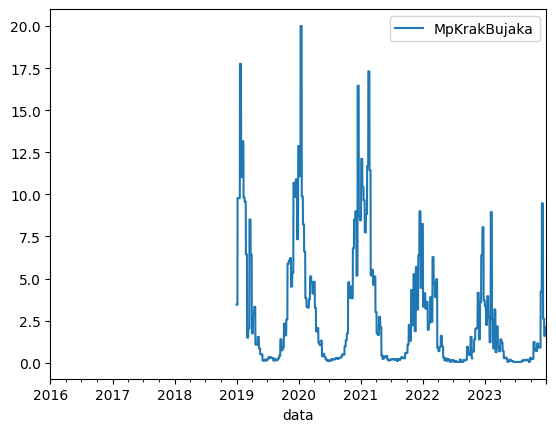

In [61]:
df_dict2024['BaP(PM10)'].plot()

In [62]:
#def concat_data(dfP):
#    dfP = pd.concat()
df_BaP = pd.concat([df_dict2015[parameters[0]], df_dict2024[parameters[0]]])
df_PM25 = pd.concat([df_dict2015[parameters[1]], df_dict2024[parameters[1]]]) # PM2.5
df_PM10 = pd.concat([df_dict2015[parameters[2]], df_dict2024[parameters[2]]])

<Axes: xlabel='data'>

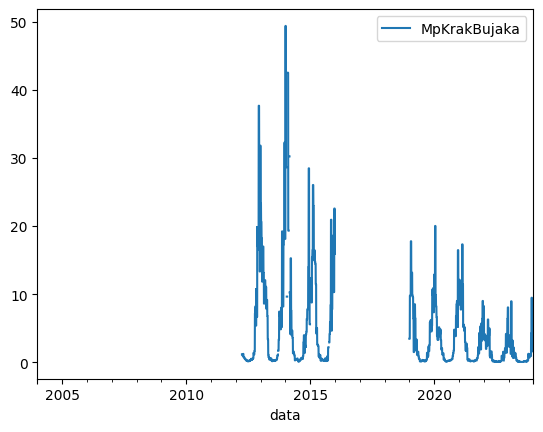

In [63]:
df_BaP.plot()

<Axes: xlabel='data'>

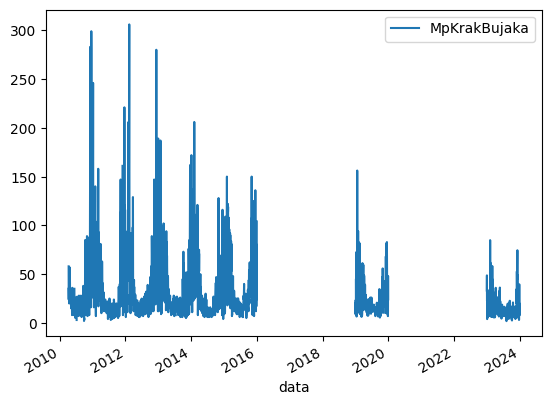

In [64]:
df_PM25.plot()

<Axes: xlabel='data'>

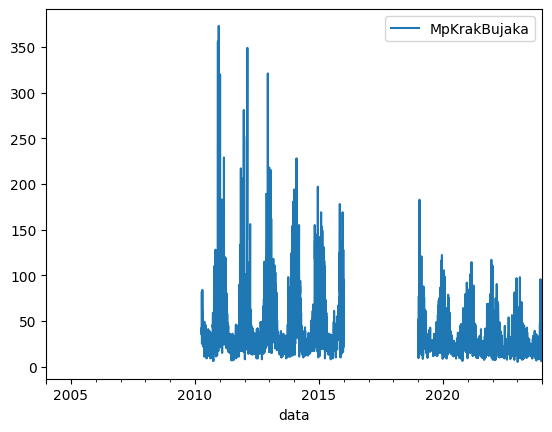

In [65]:
df_PM10.plot()